In [11]:
import numpy as np
import pandas as pd
xls = pd.ExcelFile('HAAG.xls')
DATA = xls.parse('PerpExtrusion')
T = DATA['Temperature(C)']
F = DATA['Fluence(dpa)']
Y = DATA['DV/V0(%)']
E0 = DATA['Pre-Irrad.Eo(GPa)']
EpE0 = DATA['Rel.ChangeE/EoPre-Irrad.']

<IPython.core.display.Javascript object>


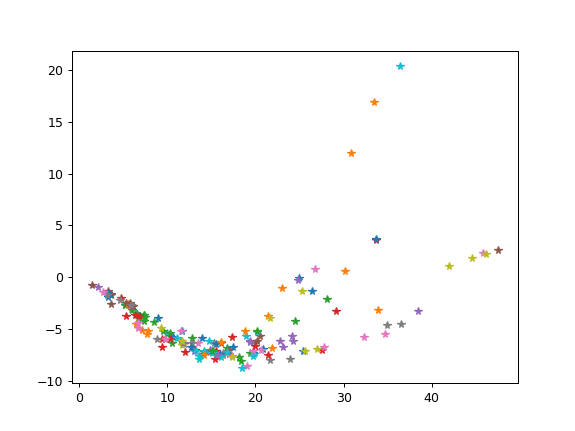

<IPython.core.display.Javascript object>


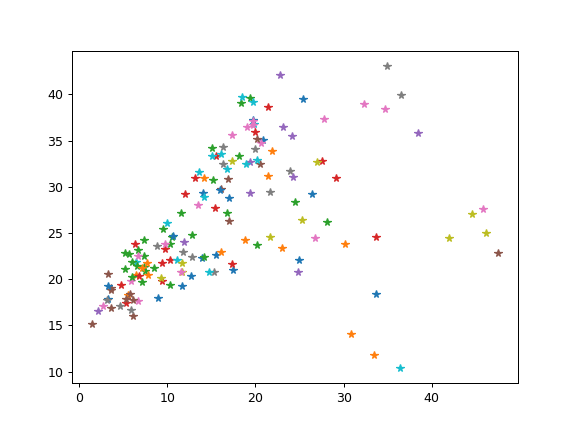

In [20]:
%matplotlib notebook
import matplotlib.pylab as plt

TEMPS = pd.unique(DATA['IrradiationTemperature(°C)'])

for temperature in TEMPS:
    SUBSET = DATA.loc[DATA['IrradiationTemperature(°C)']==temperature]
    FS = SUBSET['FastNeutronFluence(dpa)']
    YS = SUBSET['Rel.VolumeChangesΔV/V0(%)']
    E0S = SUBSET['Pre-Irrad.Eo(GPa)']
    EpE0S = SUBSET['Rel.ChangeE/EoPre-Irrad.']
    
    plt.figure(1);ax = plt.gca();color = ax._get_lines.get_next_color();plt.plot(FS,YS,'*',color=color);    
    plt.figure(2);ax = plt.gca();color = ax._get_lines.get_next_color();plt.plot(FS,E0S*EpE0S,'*',color=color)


    plt.figure(1);plt.show()
    plt.figure(2);plt.show()

<IPython.core.display.Javascript object>


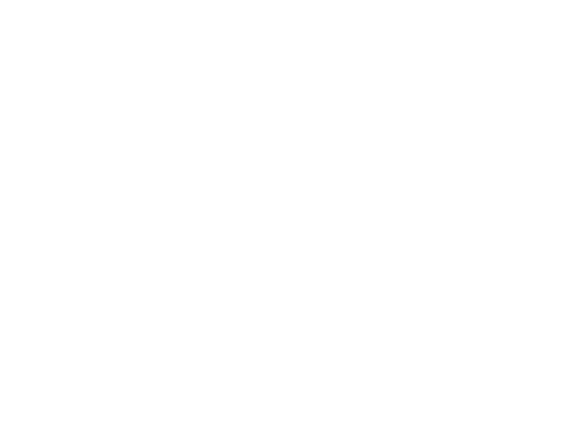

ValueError: Residuals are not finite in the initial point.

In [9]:
import numpy as np
import pandas as pd
xls = pd.ExcelFile('HAAG.xls')
DATA = xls.parse('WithGrain')
T = DATA['Temperature(°C)']
F = DATA['FastNeutronFluence(dpa)']
Y = DATA['CreepStrain(%) Tensile']
#E0 = DATA['Pre-Irrad.Eo(GPa)']
#EpE0 = DATA['Rel.ChangeE/EoPre-Irrad.']

def form_2Dfunc(X1,X2,PARAMETERS):
    T = X1
    F = X2
    a0,a1,a2,a3,a4,a5,a6,a7,a8,a9 = PARAMETERS
    return  a0 + a1*T + a2*F + a3*T*F + a4*T**2 + a5*F**2 + a6*T**3+ a7*F**3 + a8*T**2*F + a9*T*F**2

def residual(PARAMETERS,XDATA,YDATA):
    X1 = XDATA[0]
    X2 = XDATA[1]
    return form_2Dfunc(X1,X2,PARAMETERS) - YDATA

def normalize(X):
    Xmin = X.min()
    Xmax = X.max()
    return (X-Xmin)/(Xmax-Xmin),Xmin,Xmax

def original(X,Xmin,Xmax):
    return X*(Xmax-Xmin)+Xmin

def normalize1(X):
    Xmin = X.min()
    Xmax = X.max()
    return (X-Xmin)/(Xmax-Xmin)+1,Xmin,Xmax



import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

T,Tmin,Tmax = normalize(T)
F,Fmin,Fmax = normalize(F)

#Y = E0

ax.plot3D(T,F,Y,'k*')
plt.show()

%matplotlib notebook
from scipy.optimize import least_squares
res_lsq = least_squares(residual, [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],loss='soft_l1', f_scale=0.1, args=([T,F],Y))
print(res_lsq['x'])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

NT = 11
NF = 11
TT,FF = np.meshgrid(np.linspace(T.min(),T.max(),NT),np.linspace(F.min(),F.max(),NF))

X1 = np.reshape(TT,(NT*NF))
X2 = np.reshape(FF,(NT*NF))
YFUNC = np.reshape(form_2Dfunc(X1,X2,res_lsq['x']),(NT,NF))

ax.plot3D(T,F,Y,'k*')
ax.plot_surface(TT,FF,YFUNC)
plt.show()

In [10]:
DATA

,IrradiationTemperature(°C),FastNeutronFluence(dpa),Rel.LinearDimensionalChangesΔl/l0(%),Pre-Irrad.BulkDensity(g/cm3),Rel.VolumeChangesΔV/V0(%),Pre-Irrad.Eo(GPa),Rel.ChangeE/EoPre-Irrad.,R0(Ω⋅μm),Rel.ChangeΔR/R0(%),Pre-Irrad.α0(10-6/K),Rel.ChangeΔα/α0(%)
0,300,8.92,-1.10,1.830,-3.94,9.39,1.91,7.19,246,4.86,21.2
1,300,16.99,-1.92,1.830,-7.42,9.39,3.07,7.19,205,4.86,6.2
2,300,25.39,-1.75,1.830,-7.17,9.39,4.20,7.19,204,4.86,-16.5
3,299,33.92,-0.05,1.830,-3.17,NaN,NaN,7.19,229,NaN,NaN
4,310,16.80,-1.60,1.835,-6.87,8.66,3.13,7.50,199,4.72,5.3
5,308,27.56,-1.43,1.835,-7.02,8.66,3.79,7.50,181,4.72,-24.4
6,309,38.45,0.35,1.835,-3.31,8.66,4.14,7.50,222,4.72,-35.8
7,305,47.52,3.13,1.835,2.66,8.66,2.63,7.50,303,NaN,NaN
8,305,17.06,-1.83,1.778,-7.00,8.08,3.26,7.89,194,NaN,NaN
9,303,27.76,-1.43,1.778,-6.79,8.08,4.62,7.89,180,NaN,NaN


In [12]:
a = {'a':1}

In [13]:
a

{'a': 1}

In [14]:
type(a)

dict